In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import logging, sys
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, SimpleRNN

In [2]:
df = pd.read_csv('D:\python\Google_Stock_Price_Train.csv')

In [4]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',drop=True,inplace=True)
df['Volume'] = df['Volume'].str.replace(',', '').astype(float)
df['Close'] = df['Close'].str.replace(',', '').astype(float)

C:\Users\Student\AppData\Local\Temp\ipykernel_8916\949419411.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


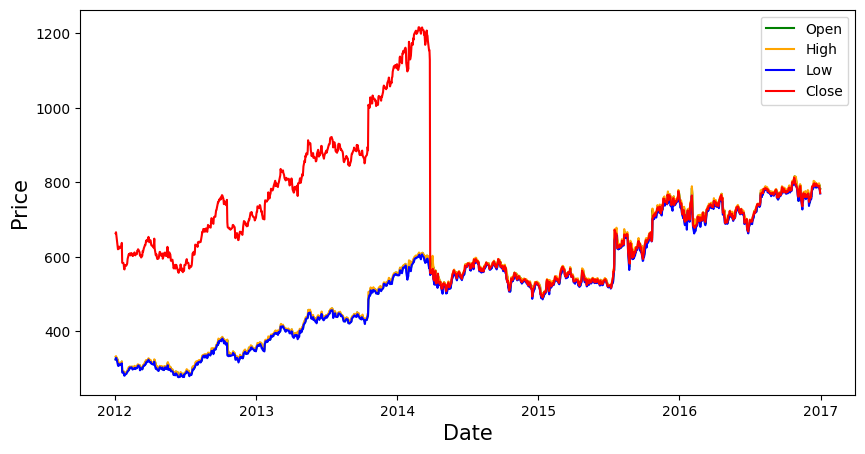

In [5]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df['Open'], label='Open', color='green')
ax.plot(df['High'], label='High', color='orange')
ax.plot(df['Low'],label='Low',color='blue')
ax.plot(df['Close'],label='Close',color='red')
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Price',size=15)
ax.legend()

fig.show()

In [6]:
df['Close'] = df.apply(lambda x: x['Close']/2 if x['Close'] > x['High'] else x['Close'], axis=1)

C:\Users\Student\AppData\Local\Temp\ipykernel_8916\949419411.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


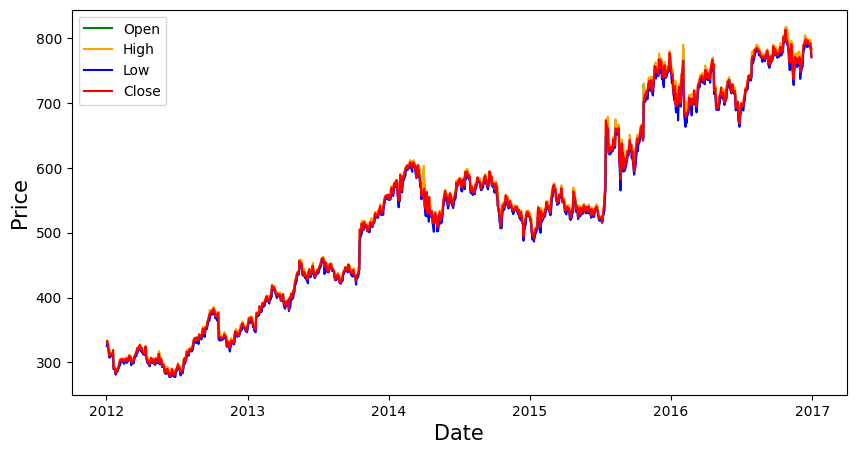

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df['Open'], label='Open', color='green')
ax.plot(df['High'], label='High', color='orange')
ax.plot(df['Low'],label='Low',color='blue')
ax.plot(df['Close'],label='Close',color='red')
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Price',size=15)
ax.legend()

fig.show()

In [8]:
predictors = ['Close']

# Drop all columns except predictors
df = df[predictors]

In [9]:
def create_sequence(dataset):
    sequences = []
    labels = []
    for i in range(len(dataset) - 10):  # Loop until 10 elements from the end
        sequences.append(dataset[i:i+10])
        labels.append(dataset[i+10])
    return np.array(sequences), np.array(labels)

In [10]:
SS = StandardScaler()
df[df.columns] = SS.fit_transform(df)

# Split data into train, validation, and test sets
split_data = np.split(df, [int(.7*len(df)), int(.85*len(df))])
# Convert data splits into NumPy arrays
train_x_rnn, valid_x_rnn, test_x_rnn = [d[predictors].to_numpy() for d in split_data]

train_seq_rnn, train_label_rnn = create_sequence(train_x_rnn)
valid_seq_rnn, valid_label_rnn = create_sequence(valid_x_rnn)
test_seq_rnn, test_label_rnn = create_sequence(test_x_rnn)
train_seq_rnn.shape, train_label_rnn.shape, valid_seq_rnn.shape, valid_label_rnn.shape, test_seq_rnn.shape, test_label_rnn.shape

c:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


((870, 10, 1), (870, 1), (179, 10, 1), (179, 1), (179, 10, 1), (179, 1))

In [11]:
RNNmodel = Sequential()
RNNmodel.add(SimpleRNN(20, 
                           input_shape = (train_seq_rnn.shape[1], train_seq_rnn.shape[2])))

RNNmodel.add(Dropout(0.1)) 
RNNmodel.add(Dense(1))
RNNmodel.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

RNNmodel.summary()

C:\Users\Student\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 20)             │           440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 461 (1.80 KB)

 Trainable params: 461 (1.80 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
RNNhistory = RNNmodel.fit(train_seq_rnn, train_label_rnn, epochs=50,validation_data=(valid_seq_rnn, valid_label_rnn), verbose=1)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.0504 - mean_absolute_error: 1.1124 - val_loss: 0.3180 - val_mean_absolute_error: 0.4699
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1999 - mean_absolute_error: 0.3588 - val_loss: 0.1590 - val_mean_absolute_error: 0.3283
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1043 - mean_absolute_error: 0.2415 - val_loss: 0.1001 - val_mean_absolute_error: 0.2601
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0745 - mean_absolute_error: 0.2009 - val_loss: 0.0739 - val_mean_absolute_error: 0.2277
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0522 - mean_absolute_error: 0.1690 - val_loss: 0.0467 - val_mean_absolute_error: 0.1799
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0350 - mean_absolute_error: 0.1415 - val_loss: 0.0463 - val_mean_absolute_error: 0.1854
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0378 - mean_absolute_error: 0.1400 - val_loss: 0.040

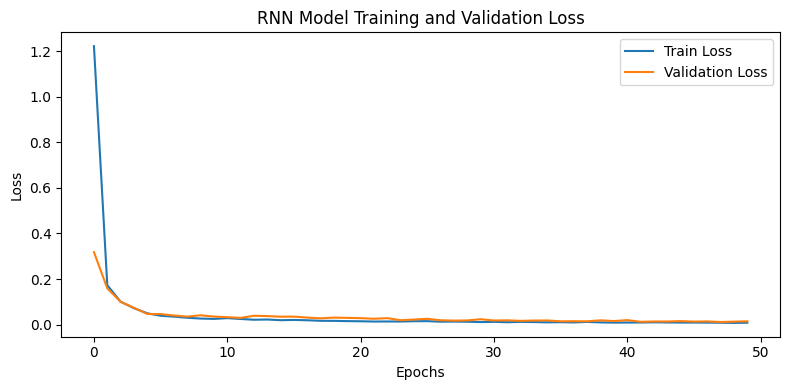

In [15]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(RNNhistory.history['loss'], label='Train Loss')
ax.plot(RNNhistory.history['val_loss'], label='Validation Loss')
ax.set_title('RNN Model Training and Validation Loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()
plt.tight_layout()
plt.show()

In [25]:
RNNtest_predicted = RNNmodel.predict(test_seq_rnn)

# Inversing scaling on predicted data
test_inverse_label_rnn = SS.inverse_transform(test_label_rnn)
RNNtest_inverse_predicted = SS.inverse_transform(RNNtest_predicted) 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


C:\Users\Student\AppData\Local\Temp\ipykernel_8916\3370062882.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


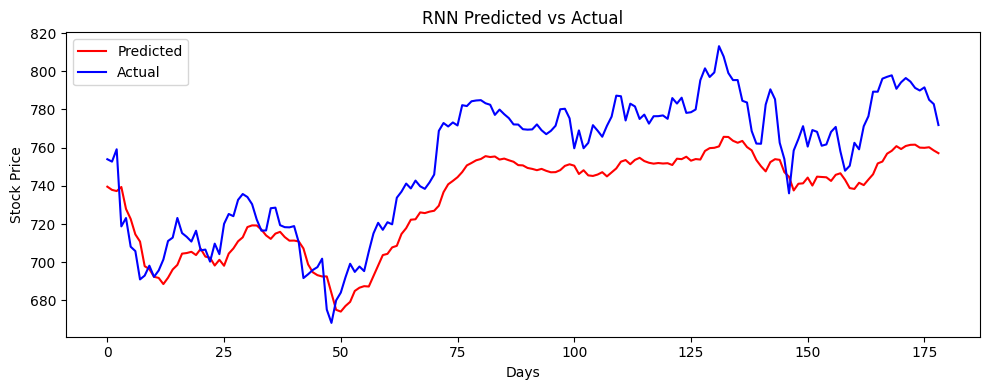

In [28]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(RNNtest_inverse_predicted, label='Predicted', color='red')
ax.plot(test_inverse_label_rnn, label='Actual', color='blue')
ax.set_title('RNN Predicted vs Actual')
ax.set_xlabel('Days')
ax.set_ylabel('Stock Price')
ax.legend()

fig.tight_layout()
fig.show()